<a href="https://colab.research.google.com/github/Enkrumah14/mannyNkrumahGenAi/blob/main/problem%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Test Point Classifications:
Point (-30, -60): Land
Point (55, 0): Land
Point (30, 70): Land
Point (10, 20): Land
Point (-30, 145): Land
Point (-80, -170): Sea
Point (80, 170): Sea
Point (0, -170): Sea
Point (-80, 170): Sea
Point (80, -170): Sea


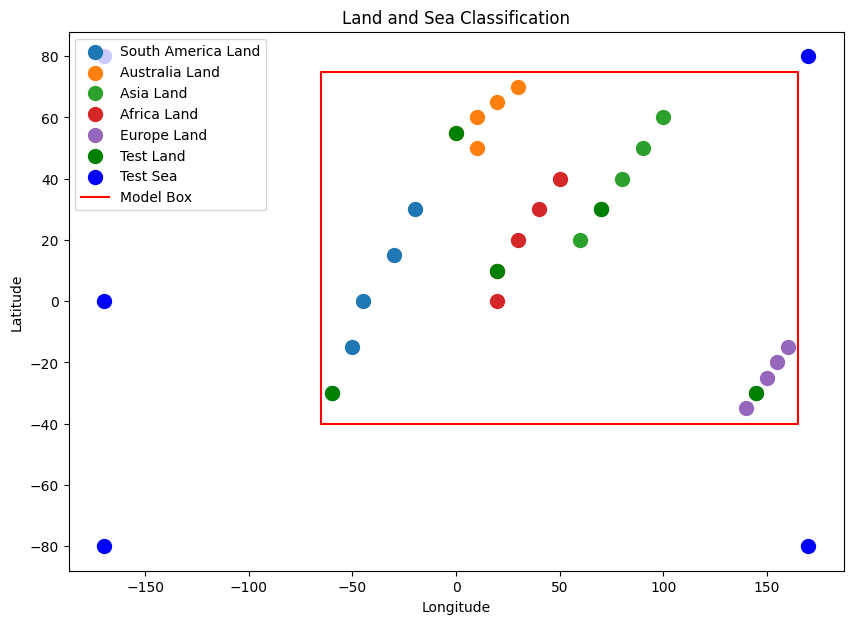

In [1]:
# Importing Libraries

# numerical operations
import numpy as np

# used for plotting
import matplotlib.pyplot as plt

# used for calculating distances
from scipy.spatial import distance

# Defining Known Land Mass Points

# A dictionary where each key is a continent and the value is a list of tuples
# representing points on that continent.

land_points = {
    'South America': [(-30, -60), (-15, -50), (0, -45), (15, -30), (30, -20)],
    'Australia': [(50, 10), (55, 0), (60, 10), (65, 20), (70, 30)],
    'Asia': [(20, 60), (30, 70), (40, 80), (50, 90), (60, 100)],
    'Africa': [(0, 20), (10, 20), (20, 30), (30, 40), (40, 50)],
    'Europe': [(-35, 140), (-30, 145), (-25, 150), (-20, 155), (-15, 160)]
}

# Defining a Grid of Points

# Create a grid of points with latitude ranging from -90 to 90 and longitude
# from -180 to 180 in steps of 10.

grid_points = [(x, y) for x in range(-90, 91, 10) for y in range(-180, 181, 10)]

# Calculating Prior Probabilities

# This function calculates the prior probabilities of a point being land or sea based on
# the number of land points versus the total points.

def calculate_prior_probabilities(land_points, total_points):
    P_land = sum(len(points) for points in land_points.values()) / total_points
    P_sea = 1 - P_land

    return P_land, P_sea

# Calculating Likelihoods

# This function calculates the likelihoods of points being land or sea based on their distances
# to the nearest land point.

# The likelihood decreases exponentially with increasing distance from land.

def calculate_likelihoods(grid_points, land_points, test_points):
    likelihoods_land = {}
    likelihoods_sea = {}

    all_land_points = [point for points in land_points.values() for point in points]

    # Include test points in the grid points
    all_points = grid_points + test_points

    for point in all_points:
        distances_to_land = distance.cdist([point], all_land_points, 'euclidean').min()
        likelihoods_land[point] = np.exp(-distances_to_land)  # Exponential decay
        likelihoods_sea[point] = 1 - likelihoods_land[point]  # Opposite of land

    return likelihoods_land, likelihoods_sea

# Classifying Points

# This function classifies a point as land if its likelihood of being land is greater than the threshold,
# otherwise classifies it as sea.

def classify_point(point, likelihoods_land, threshold=0.5):
    likelihood = likelihoods_land.get(point, 0)
    if likelihood > threshold:
        return 'Land'
    else:
        return 'Sea'

# Define the plot_points function

def plot_points(land_points, test_points, test_classifications, box_bounds):
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot known land points
    for continent, points in land_points.items():
        points = np.array(points)
        ax.scatter(points[:, 1], points[:, 0], label=f'{continent} Land', s=100)

    # Plot the test points with different colors based on classification
    for point, classification in zip(test_points, test_classifications):
        if classification == 'Land':
            ax.scatter(point[1], point[0], color='green', s=100, label='Test Land')
        else:
            ax.scatter(point[1], point[0], color='blue', s=100, label='Test Sea')

    # Plot the bounds of the model box
    x_min, x_max, y_min, y_max = box_bounds
    ax.plot([y_min, y_max, y_max, y_min, y_min], [x_min, x_min, x_max, x_max, x_min], color='red', label='Model Box')

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Land and Sea Classification')

    # Add legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Display the plot
    plt.show()

# Main Execution

# This section calculates the total grid points, prior probabilities, likelihoods,
# defines the model box, classifies test points, prints the classifications, and
# plots the points and the model.

# Total points in the grid
total_points = len(grid_points)

# Calculate prior probabilities
P_land, P_sea = calculate_prior_probabilities(land_points, total_points)

# Define unknown test cases
test_points = [
    (-30, -60), (55, 0), (30, 70), (10, 20), (-30, 145), (-80, -170), (80, 170), (0, -170), (-80, 170), (80, -170)
]

# Calculate likelihoods
likelihoods_land, likelihoods_sea = calculate_likelihoods(grid_points, land_points, test_points)

# Define the bounds of the model box
all_land_x = [point[0] for points in land_points.values() for point in points]
all_land_y = [point[1] for points in land_points.values() for point in points]
x_min, x_max = min(all_land_x) - 5, max(all_land_x) + 5
y_min, y_max = min(all_land_y) - 5, max(all_land_y) + 5
box_bounds = (x_min, x_max, y_min, y_max)

# Define the likelihood threshold
threshold = 0.5

# Classify test points based on likelihoods
test_classifications = [classify_point(point, likelihoods_land, threshold) for point in test_points]

# Print test point classifications
print("\nTest Point Classifications:")
for point, classification in zip(test_points, test_classifications):
    print(f"Point {point}: {classification}")

# Plot the points and the model
plot_points(land_points, test_points, test_classifications, box_bounds)
